# IrisFlowersDataAnalysis


Considering the Iris flowers data with response variable as Class.

1. Import the data dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/ (Links to an external     site.) (1 points).
2. Identify the presence of missing values, write the code to fill the missing values with mean for numerical            attributes and mode value for categorical attributes. (2 points)
3. Visualize the dataset. (1 points)
4. Extract X as all columns except the Class column and Y as Class column. (1 point)
5. Split the data into training set and testing set. (1 points)
6. Train a Logistic regression model for the dataset. (2 points)
7. Compute the accuracy and confusion matrix. (2 points)
8. Plot the decision boundary, visualize training and test results (2 point)
9. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column    name: Predicted). (1 points)

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.manifold import TSNE

## Importing data

In [2]:
df = pd.read_csv("iris.data")
df = df.replace(to_replace=['?', '\t?'], value=np.nan)
df.head(3)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa


## Understanding statistics of data

In [3]:
df.columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Count All Distinct Classes

In [4]:
df.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: species, dtype: int64

## Check for null dataset

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Since none of the data is null therefor it is not required to fill up the missing values and write the code to fill the missing values with mean for numerical attributes and mode value for categorical attributes.  

## visualize all the categories in data and records per category

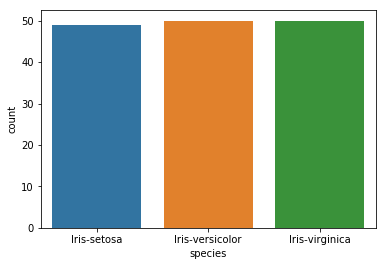

In [6]:
sns.countplot(df['species'])

## Exploratory Data Analysis

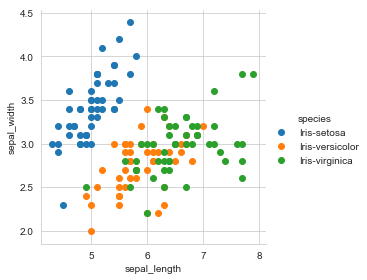

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();

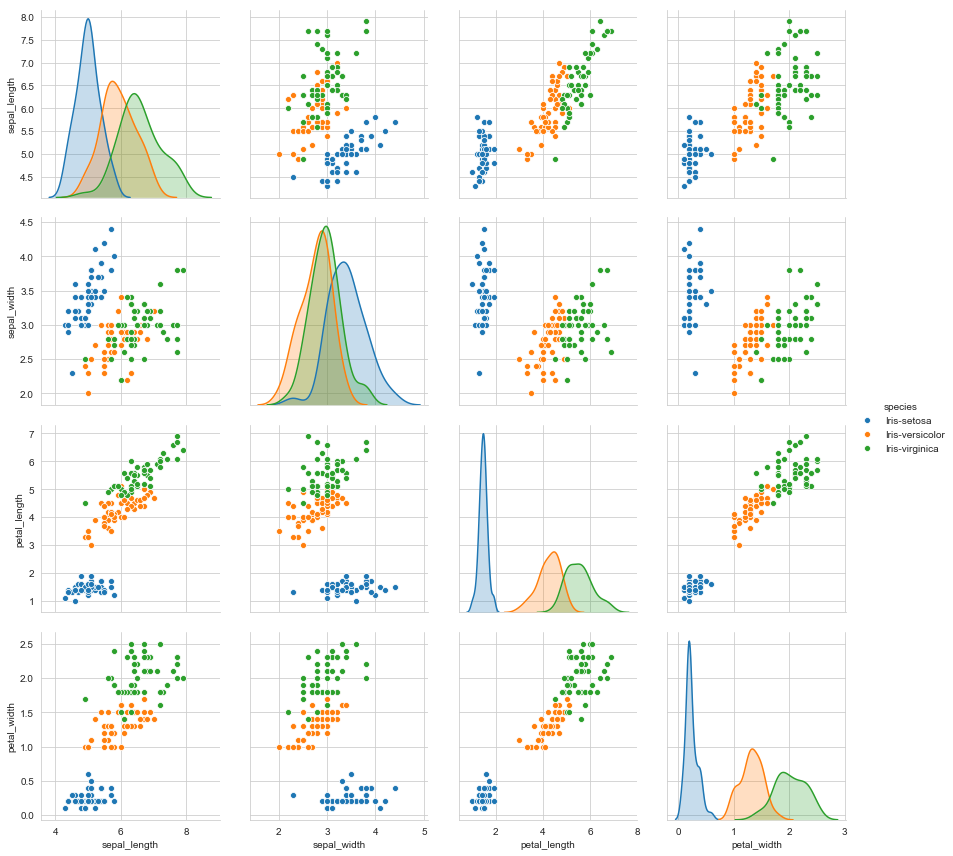

In [8]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", height=3);

## Visualize the correlation

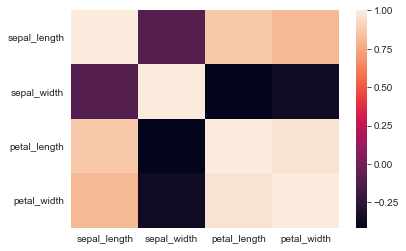

In [9]:
sns.heatmap(df.corr())

## Convert the categorical class Attribute to numerical Value

In [10]:
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0


In [11]:
X = df.drop(df.columns[4], axis=1)
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2


In [12]:
y = df[df.columns[4]]
y.head(3)

0    0
1    0
2    0
Name: species, dtype: int64

## Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=44, stratify=y)

In [14]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
33,4.9,3.1,1.5,0.1
41,4.4,3.2,1.3,0.2
73,6.4,2.9,4.3,1.3


In [15]:
X_test.head(3)

,sepal_length,sepal_width,petal_length,petal_width
121,7.7,2.8,6.7,2.0
3,5.0,3.6,1.4,0.2
94,5.7,3.0,4.2,1.2


In [16]:
y_train.head(3)

33    0
41    0
73    1
Name: species, dtype: int64

In [17]:
y_test.head(3)

121    2
3      0
94     1
Name: species, dtype: int64

## Replacing missing attributes with mean value in training data set

In [18]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train = pd.DataFrame(mean_imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(mean_imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
X_test.head(3)

,sepal_length,sepal_width,petal_length,petal_width
121,7.7,2.8,6.7,2.0
3,5.0,3.6,1.4,0.2
94,5.7,3.0,4.2,1.2


## Feature Scaling(Normalize the dataset)

In [19]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting  Logistic  Regression to the Training set

In [20]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression(C=1.0,max_iter=100,multi_class='auto')

In [21]:
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
y_pred

array([2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2,
       1])

## Verify the Model Accuracy

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.9555555555555556


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

## Visualizing decision boundary

Text(0, 0.5, 'sepal_width')

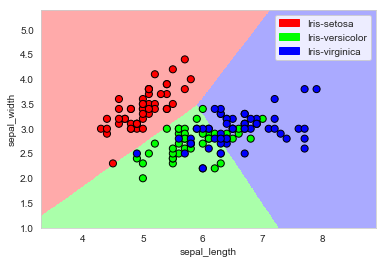

In [23]:
#["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X_mat = X[['sepal_length', 'sepal_width']].values
y_mat = y.values
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
    
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
logReg.fit(X_mat, y_mat)
Z = logReg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='Iris-setosa')
patch1 = mpatches.Patch(color='#00FF00', label='Iris-versicolor')
patch2 = mpatches.Patch(color='#0000FF', label='Iris-virginica')
plt.legend(handles=[patch0, patch1, patch2])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

## Visualizing The Predictions

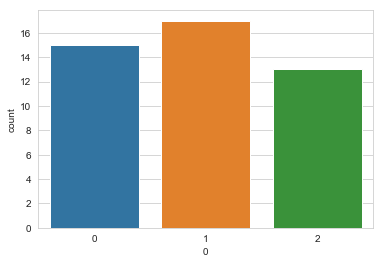

In [24]:
y_pred=pd.DataFrame(y_pred)
sns.countplot(x=0,data=y_pred)

In [25]:
y_test.head(2)

121    2
3      0
Name: species, dtype: int64

In [26]:
y_pred.head(2)

,0
0,2
1,0


In [27]:
y_test = y_test.reset_index() 
y_test=pd.DataFrame(y_test)

## Creating an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted)

In [28]:
output = pd.concat([y_test, y_pred], axis=1)
output.columns=["y_test_index", "Actual", "Predicted"]
output.head(3)

,y_test_index,Actual,Predicted
0,121,2,2
1,3,0,0
2,94,1,1


In [29]:
output[['Actual', 'Predicted']] = output[['Actual', 'Predicted']].replace(to_replace={0: 'Iris-setosa', 1: 'Iris-versicolor',2:'Iris-virginica'})
output.to_csv('output.csv', index=False)